# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier


---
## Step 0: Load The Data

In [229]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
validation_file = 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']
len(y_train)

34799

---

## Step 1: Dataset Summary & Exploration



### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [263]:
import numpy as np

### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(y_train)

# TODO: Number of validation examples
n_validation = len(y_valid)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = np.shape(X_train[0])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualizing the German Traffic Signs Dataset using the pickled file(s). 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Plotting a random image of class  14 ( Stop )


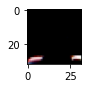

In [264]:
### Data exploration visualization code goes here.
import random
import matplotlib.pyplot as plt
import csv
# Visualizations will be shown in the notebook.
%matplotlib inline


with open('signnames.csv', mode='r') as infile:
    reader = csv.reader(infile,)
    sign_dict = {rows[0]:rows[1] for rows in reader if len(rows) == 2}    
    
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print('Plotting a random image of class ', y_train[index], '(', sign_dict[str(y_train[index])], ')')



In [268]:
print(X_train[index].shape)

(32, 32, 3)


Count of the classes in the training and test set:


Text(0.5, 1.0, 'Test set')

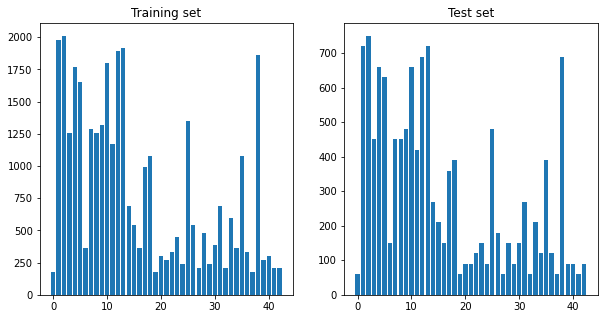

In [269]:
class_count_train = []
class_count_test = []
for i in range(0, n_classes):
    class_count_train.append(list(y_train).count(i))
    class_count_test.append(list(y_test).count(i))

print('Count of the classes in the training and test set:')
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.bar(range(0, n_classes), class_count_train)
plt.title('Training set')
plt.subplot(1, 2, 2)
plt.bar(range(0, n_classes), class_count_test)
plt.title('Test set')

----

## Step 2: Design and Test a Model Architecture

Modified LeNet

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 



In [270]:
import numpy as np
from sklearn.utils import shuffle

### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

# incase this cell is run multiple times
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# normalize the data:
X_train, y_train = np.array(X_train, dtype=np.float) , np.array(y_train)
X_train = (X_train - 128) / 128
X_valid, y_valid = np.array(X_valid, dtype=np.float) , np.array(y_valid)
X_valid = (X_valid - 128) / 128
X_test, y_test = np.array(X_test, dtype=np.float) , np.array(y_test)
X_test = (X_test - 128) / 128
    
# shuffling the training data
X_train, y_train = shuffle(X_train, y_train)


### Model Architecture

In [271]:
from tensorflow.compat.v1.layers import flatten
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1, name='conv_layer_1')

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    # Activation.
    conv2 = tf.nn.relu(conv2)
    
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    #Layer 3: Convolutional. Output = 3x3x32.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 16, 64), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(64))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    
    # Activation.
    conv3 = tf.nn.relu(conv3)
    
    # Pooling. Input = 10x10x16. Output = 5x5x32.
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 1, 1, 1], strides=[1, 1, 1, 1], padding='VALID')

    # Flatten. Input = 6x6x16. Output = 400.
    fc0   = flatten(conv3)

    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(3*3*64, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [274]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


EPOCHS = 100
BATCH_SIZE = 128

### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()



In [275]:
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    #print("LENGTH OF DATA", num_examples)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        #print("images :", batch_x, "labes:", batch_y)
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        #print("ACCURACY OF GIVEN BATCH:", accuracy)
        #print("LENGTH, Batch Correct label:", len(batch_y))
        total_accuracy += (accuracy * len(batch_x))
        #print("Batch Total Accuracy", total_accuracy)
    return total_accuracy / num_examples

In [276]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    validation_acc_ep = []
    training_acc_ep = []
    test_acc_ep = []
    
    epochs_array = []
    print("Training for ", EPOCHS, " epochs ...")
    print()
     
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        validation_acc_ep.append(validation_accuracy)
        
        training_accuracy = evaluate(X_train, y_train)
        training_acc_ep.append(training_accuracy)
        
        test_accuracy = evaluate(X_test, y_test)
        test_acc_ep.append(test_accuracy)
        
        epochs_array.append(i)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    saver.save(sess, './lenet')
    print("Model saved")

Training for  100  epochs ...

EPOCH 1 ...
Validation Accuracy = 0.813

EPOCH 2 ...
Validation Accuracy = 0.880

EPOCH 3 ...
Validation Accuracy = 0.911

EPOCH 4 ...
Validation Accuracy = 0.902

EPOCH 5 ...
Validation Accuracy = 0.924

EPOCH 6 ...
Validation Accuracy = 0.924

EPOCH 7 ...
Validation Accuracy = 0.932

EPOCH 8 ...
Validation Accuracy = 0.930

EPOCH 9 ...
Validation Accuracy = 0.939

EPOCH 10 ...
Validation Accuracy = 0.928

EPOCH 11 ...
Validation Accuracy = 0.933

EPOCH 12 ...
Validation Accuracy = 0.942

EPOCH 13 ...
Validation Accuracy = 0.938

EPOCH 14 ...
Validation Accuracy = 0.927

EPOCH 15 ...
Validation Accuracy = 0.936

EPOCH 16 ...
Validation Accuracy = 0.926

EPOCH 17 ...
Validation Accuracy = 0.920

EPOCH 18 ...
Validation Accuracy = 0.930

EPOCH 19 ...
Validation Accuracy = 0.946

EPOCH 20 ...
Validation Accuracy = 0.939

EPOCH 21 ...
Validation Accuracy = 0.919

EPOCH 22 ...
Validation Accuracy = 0.946

EPOCH 23 ...
Validation Accuracy = 0.939

EPOCH 24 ...

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.941
Test Accuracy = 1.000


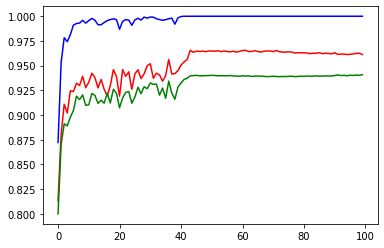

In [283]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
# Plot the training and validation accuracies
plt.plot(epochs_array, training_acc_ep, 'b')
plt.plot(epochs_array, validation_acc_ep, 'r')
plt.plot(epochs_array, test_acc_ep, 'g')
print("Test Accuracy = {:.3f}".format(training_accuracy))

In [278]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.941


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

Network will be tested on the following examples collected on the web:


<Figure size 72x72 with 0 Axes>

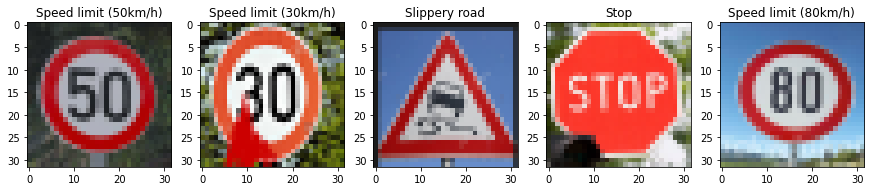

In [284]:
import cv2
import os
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import pandas as pd
import csv
#signnames = 'signnames.csv'
#signnames =csv.reader(signnames)

### Load the images and plot them here.
plt.figure(figsize=(1,1))

### Load the images and plot them here.
#plt.figure(figsize=(1,1))
test_images_un = []
for filename in os.listdir('test_signs/'):
    if filename.endswith(".png"):
        img = cv2.cvtColor(cv2.imread('test_signs/'+ filename), cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (32,32), interpolation = cv2.INTER_AREA) 
        test_images_un.append(img)
correct_labels = np.array([2, 1, 23, 14, 5])
one_hot_labels = tf.one_hot(correct_labels, 43)
plt.figure(figsize=(15,15))
print('Network will be tested on the following examples collected on the web:')

for i in range(0,len(test_images_un)):
    plt.subplot(1, len(test_images_un), i+1)
    plt.imshow(test_images_un[i])
    plt.title(sign_dict[str(correct_labels[i])])

    


In [285]:
# Normalize the data
test_images, correct_labels = np.array(test_images_un, dtype=np.float32) , np.array(correct_labels)
test_images = (test_images - 128) / 128
    

### Predict the Sign Type for Each Image

In [286]:
### Run the predictions here and use the model to output the prediction for each image.
#predictions = LeNet(np.array(test_images, dtype=np.float32))
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    saver.restore(sess, "./lenet")
    test_accuracy = evaluate(test_images, correct_labels)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
print("Accuracy of my network for the new data: ", test_accuracy)

INFO:tensorflow:Restoring parameters from ./lenet
INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 1.000
Accuracy of my network for the new data:  1.0


### Analyze Performance

INFO:tensorflow:Restoring parameters from ./lenet
INFO:tensorflow:Restoring parameters from ./lenet


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Guess for the following image:


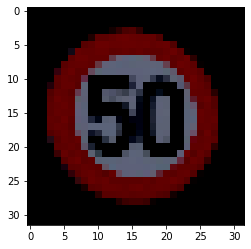

1. Guess: Class  2 Speed limit (50km/h) with probability:  100.0000  %
2. Guess: Class  1 Speed limit (30km/h) with probability:    0.0000  %
3. Guess: Class  31 Wild animals crossing with probability:    0.0000  %
4. Guess: Class  0 Speed limit (20km/h) with probability:    0.0000  %
5. Guess: Class  3 Speed limit (60km/h) with probability:    0.0000  %
INFO:tensorflow:Restoring parameters from ./lenet
INFO:tensorflow:Restoring parameters from ./lenet


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Guess for the following image:


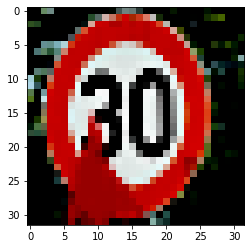

1. Guess: Class  1 Speed limit (30km/h) with probability:  100.0000  %
2. Guess: Class  0 Speed limit (20km/h) with probability:    0.0000  %
3. Guess: Class  2 Speed limit (50km/h) with probability:    0.0000  %
4. Guess: Class  5 Speed limit (80km/h) with probability:    0.0000  %
5. Guess: Class  4 Speed limit (70km/h) with probability:    0.0000  %
INFO:tensorflow:Restoring parameters from ./lenet
INFO:tensorflow:Restoring parameters from ./lenet


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Guess for the following image:


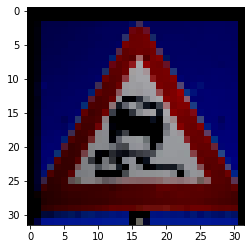

1. Guess: Class  23 Slippery road with probability:  100.0000  %
2. Guess: Class  19 Dangerous curve to the left with probability:    0.0000  %
3. Guess: Class  0 Speed limit (20km/h) with probability:    0.0000  %
4. Guess: Class  1 Speed limit (30km/h) with probability:    0.0000  %
5. Guess: Class  2 Speed limit (50km/h) with probability:    0.0000  %
INFO:tensorflow:Restoring parameters from ./lenet
INFO:tensorflow:Restoring parameters from ./lenet


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Guess for the following image:


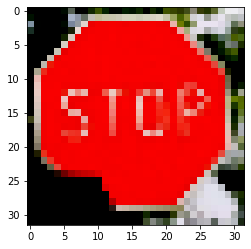

1. Guess: Class  14 Stop with probability:  100.0000  %
2. Guess: Class  3 Speed limit (60km/h) with probability:    0.0000  %
3. Guess: Class  5 Speed limit (80km/h) with probability:    0.0000  %
4. Guess: Class  25 Road work with probability:    0.0000  %
5. Guess: Class  29 Bicycles crossing with probability:    0.0000  %
INFO:tensorflow:Restoring parameters from ./lenet
INFO:tensorflow:Restoring parameters from ./lenet


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Guess for the following image:


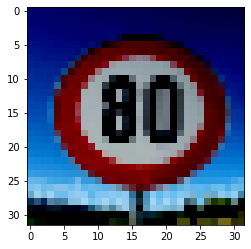

1. Guess: Class  5 Speed limit (80km/h) with probability:   99.9870  %
2. Guess: Class  2 Speed limit (50km/h) with probability:    0.0130  %
3. Guess: Class  7 Speed limit (100km/h) with probability:    0.0000  %
4. Guess: Class  3 Speed limit (60km/h) with probability:    0.0000  %
5. Guess: Class  15 No vehicles with probability:    0.0000  %


In [287]:
# show top five guesses
k = 5
softmax_test = tf.nn.softmax(logits)
top_k_classes = tf.nn.top_k(softmax_test, k)

for i in range(len(test_images)):
    image = test_images[i]
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        saver.restore(sess, "./lenet")
        softmax_logits = sess.run(softmax_test, feed_dict={x: np.array([image])})
        top_classes = sess.run(top_k_classes, feed_dict={x: np.array([image])})
        #print("Softmax Logits", softmax_logits)
        print("Guess for the following image:")
        plt.imshow(image)
        plt.show()

        top_k_indicies = top_classes.indices[0]
        top_k_values = top_classes.values[0]
        # print the top k classes
        for j in range(k):
            print(str(j + 1) + ". Guess:", "Class ", top_k_indicies[j], sign_dict[str(top_k_indicies[j])], "with probability:{:10.4f} ".format( 100 * top_k_values[j]),"%")